ACC_CMPC protocol! 

Elapsed : 4.952777147293091
Elapsed : 7.398923873901367
Elapsed : 9.23743224143982
Elapsed : 11.027615070343018
Elapsed : 12.963744640350342
Elapsed : 15.308874130249023
Elapsed : 17.687607049942017
Elapsed : 26.054585933685303
Elapsed : 28.838886976242065
Elapsed : 32.34342384338379
Elapsed : 35.66728925704956

 ACC_BMPC protocol! 

Elapsed : 1.610093116760254
Elapsed : 2.2020480632781982
Elapsed : 2.7091431617736816
Elapsed : 3.2856829166412354
Elapsed : 3.88525390625
Elapsed : 4.484035968780518
Elapsed : 5.233191967010498
Elapsed : 11.514309883117676
Elapsed : 13.209891080856323
Elapsed : 15.013837814331055
Elapsed : 16.590578317642212

 OLR protocol!
Elapsed : 0.8425581455230713
Elapsed : 1.8745968341827393
Elapsed : 5.438029050827026
Elapsed : 11.095974206924438
Elapsed : 19.0539128780365
Elapsed : 28.951398134231567
Elapsed : 30.38984489440918
Elapsed : 40.949259996414185
Elapsed : 52.567415952682495
Elapsed : 67.58435893058777
Elapsed : 82.37839818000793


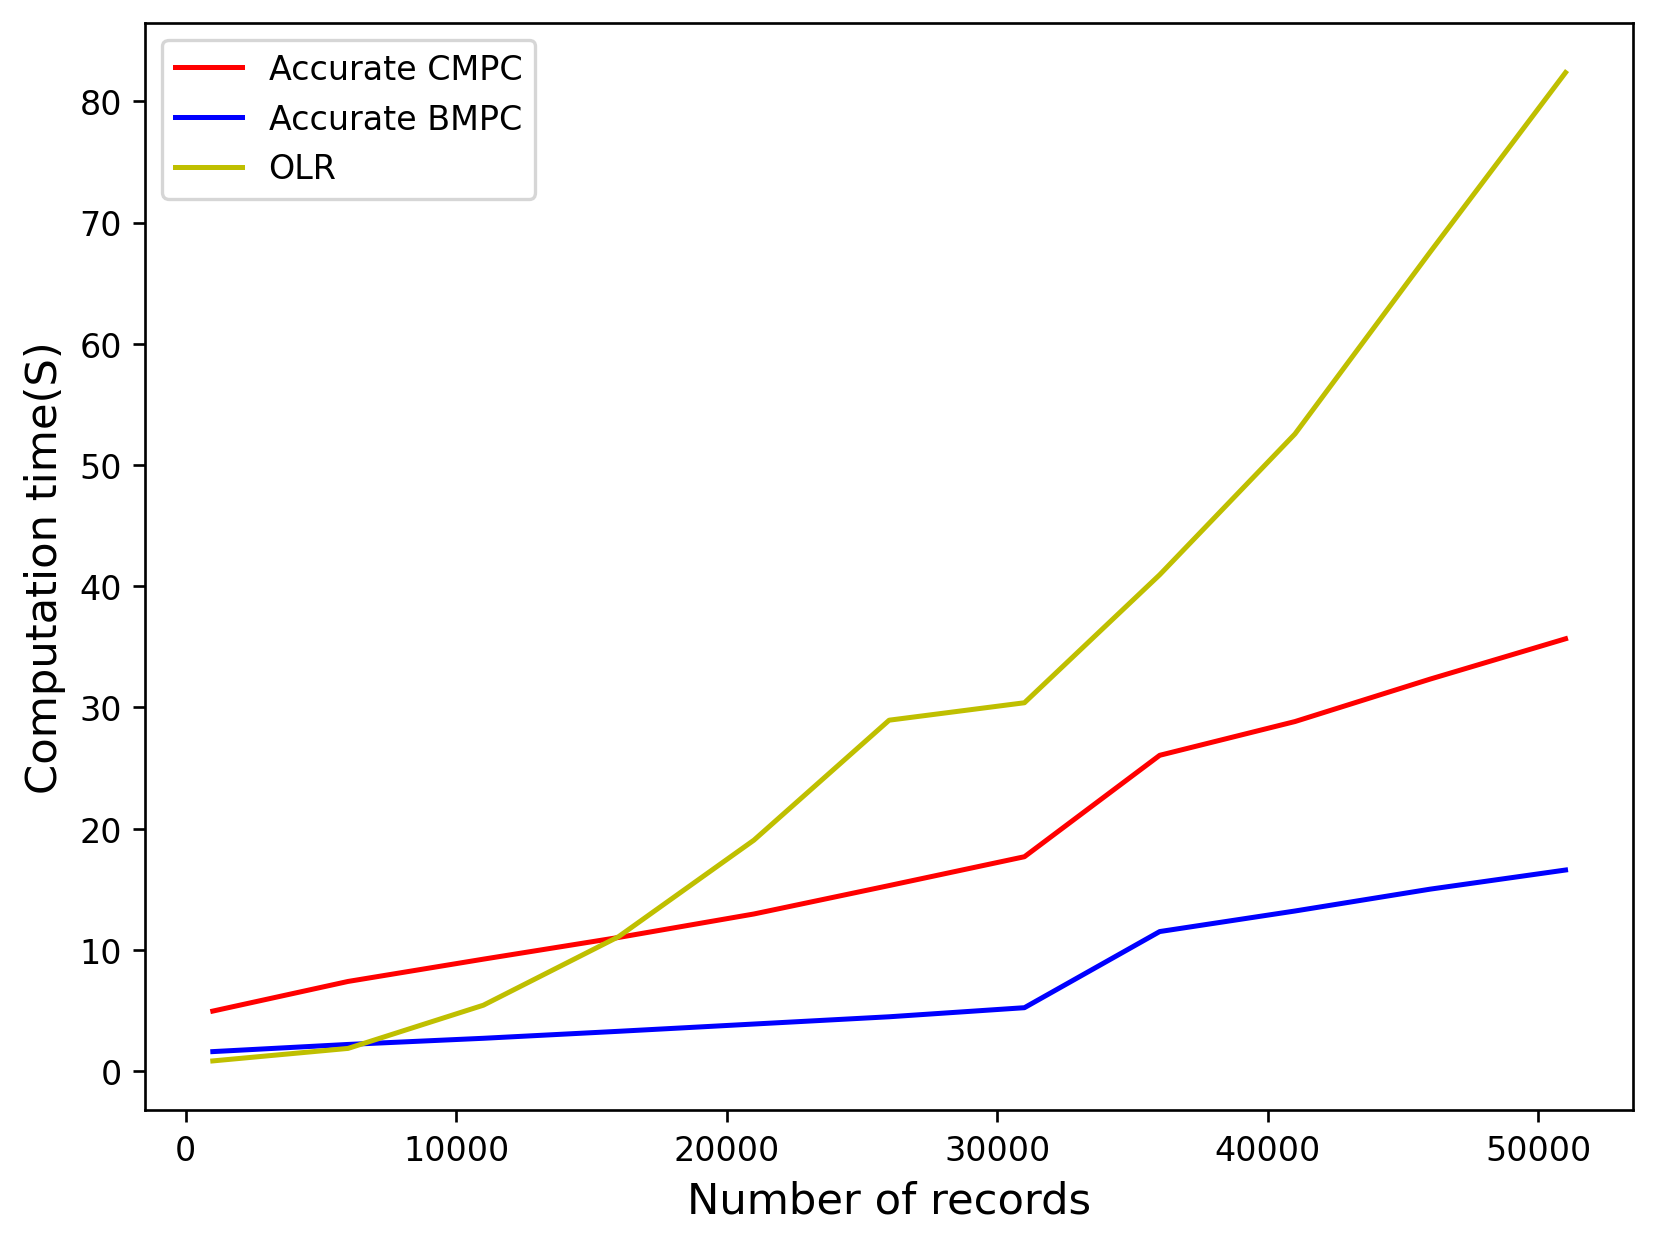

In [2]:
import sys
import warnings
import concurrent.futures
import queue
import numpy as np
import time
import pandas as pd
import atexit
from time import time, strftime, localtime
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

np.set_printoptions(suppress=True)
np.warnings.filterwarnings('ignore')
np.set_printoptions(threshold=sys.maxsize)
from matplotlib.pyplot import figure


def ACC_CMPC(i,j):
    ###################################################################################

    def share(input):
        # print(input)
        rs1 = np.random.RandomState(10)
        x = 0.00000001 * rs1.random((np.shape(input)))

        rs2 = np.random.RandomState(20)
        y = 0.00000001 * rs2.random((np.shape(input)))

        z = input - x - y

        return x, y, z

    def sharey(input):
        np.random.seed(1)
        x = np.random.randint(0, 2, np.shape(input))

        np.random.seed(1)
        y = np.random.randint(0, 2, np.shape(input))

        z = input - x - y

        return x, y, z

    ###################################################################################

    sizex = i
    sizey = j

    rs12 = np.random.RandomState(1)
    X_train = np.round(rs12.uniform(-1, 1, (sizex, sizey)), 7)
    X_train1, X_train2, X_train3 = share(X_train)

    rs13 = np.random.RandomState(2)
    y_train = rs13.randint(0, 2, (sizex, 1))
    y_train1, y_train2, y_train3 = sharey(y_train)

    ###################################################################################

    #     data = pd.read_csv('lbw.csv')

    #     Y1 = data.iloc[:, -1:]
    #     y = Y1.values.reshape(np.shape(data)[0], 1)

    #     data.drop(data.columns[len(data.columns) - 1], axis=1, inplace=True)
    #     X = np.array(data)

    #     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

    #     X_train1 , X_train2 , X_train3 = share(X_train)
    #     y_train1 , y_train2 , y_train3 = sharey(y_train)

    ###################################################################################

    def CP1(beta):

        def mul_multiply(first, second):

            rs1 = np.random.RandomState(1)
            r12 = rs1.uniform(0.0000000001, 10 ** (-40), np.shape(first))

            rs2 = np.random.RandomState(2)
            j12 = rs2.uniform(0.0000000001, 10 ** (-40), np.shape(second))
            # print(r12)

            q1.put(r12)
            q1.put(j12)

            r31 = q3.get()
            j31 = q3.get()

            XA11 = first + r12 - r31

            XB11 = second + j12 - j31

            q11.put(XA11)
            q11.put(XB11)

            XA33 = q33.get()
            XB33 = q33.get()

            W1 = XA11 * XB11 + XA11 * XB33 + XA33 * XB11
            # print(W1)

            return W1

        def mul_multiply_matrix_full(first, second):
            # print(first)

            rs3 = np.random.RandomState(3)
            r12 = 0.01 * rs3.random((np.shape(first)))
            # print(r12)
            rs4 = np.random.RandomState(4)
            j12 = 0.01 * rs4.random((np.shape(second)))

            q1.put(r12)
            q1.put(j12)

            r31 = q3.get()
            j31 = q3.get()

            XA11 = first + r12 - r31
            # print(XA11)

            XB11 = second + j12 - j31
            # print(j31)

            q11.put(XA11)
            q11.put(XB11)

            XA33 = q33.get()
            XB33 = q33.get()

            W1 = XA11.dot(XB11) + XA11.dot(XB33) + XA33.dot(XB11)

            return W1

        def mul_sharemind_matrix_direct(first, second):
            # print(second)

            rs5 = np.random.RandomState(5)
            r12 = rs5.uniform(0.0000000001, 10 ** (-40), np.shape(first))
            rs6 = np.random.RandomState(6)
            j12 = rs6.uniform(0.0000000001, 10 ** (-40), np.shape(second))

            q1.put(r12)
            q1.put(j12)

            r31 = q3.get()
            j31 = q3.get()

            XA11 = first + r12 - r31
            XB11 = second + j12 - j31

            q11.put(XA11)
            q11.put(XB11)

            XA33 = q33.get()
            XB33 = q33.get()

            W1 = np.multiply(XA11, XB11) + np.multiply(XA11, XB33) + np.multiply(XA33, XB11)
            return W1

        X = X_train1
        y = y_train1

        H_temp = mul_multiply_matrix_full(X.T, X)

        c = 0.0000002
        q = np.size(H_temp, 0)
        I = np.identity(q)
        Xs = mul_multiply(c, I / 3)
        Ms = mul_multiply(c, H_temp)

        for x in range(0, 25):
            Ms_Xs = mul_multiply_matrix_full(Xs, Ms)
            mul_2 = mul_multiply([[2 / 3]], Xs)
            X_s_t = mul_2 - Ms_Xs

            Ms_Ms = mul_multiply_matrix_full(Ms, Ms)
            Ms_2 = mul_multiply([[2 / 3]], Ms)
            M_s_t = Ms_2 - Ms_Ms

            Xs = X_s_t
            Ms = M_s_t

        M_s_t_temp = M_s_t

        Hessian_Invers_TEMP = X_s_t

        Hessian_Invers = -4 * Hessian_Invers_TEMP

        for i in range(0, 20):

            beta_old = beta

            np.random.seed(1)
            XB = mul_multiply_matrix_full(X, beta)

            Pi_temp = np.exp(-XB)

            Pi_temp11, Pi_temp12, Pi_temp13 = share(Pi_temp)

            q12.put(Pi_temp12)
            q13.put(Pi_temp13)

            Pi_temp21 = q31.get()
            Pi_temp31 = q21.get()

            e_to_the_XB_temp = mul_sharemind_matrix_direct(Pi_temp11, Pi_temp21)

            e_to_the_XB = mul_sharemind_matrix_direct(e_to_the_XB_temp, Pi_temp31) + 0.4

            np.random.seed(1)
            c_0_1 = np.random.uniform(0.01, 10 ** (-5), np.shape(e_to_the_XB))
            Xs = c_0_1 * 1 / 3
            Ms = mul_sharemind_matrix_direct(c_0_1 * 1 / 3, e_to_the_XB)

            for x in range(0, 20):
                Ms_Xs = mul_sharemind_matrix_direct(Xs, Ms)
                # print(Ms)
                mul_2 = mul_multiply([[2 / 3]], Xs)
                X_s_t = mul_2 - Ms_Xs

                Ms_Ms = mul_sharemind_matrix_direct(Ms, Ms)
                Ms_2 = mul_multiply([[2 / 3]], Ms)
                M_s_t = Ms_2 - Ms_Ms

                Xs = X_s_t
                Ms = M_s_t

            grad_temp = y - X_s_t

            Gradient = mul_multiply_matrix_full(X.T, grad_temp)
            step = mul_multiply_matrix_full(Hessian_Invers, Gradient)

            beta = beta_old - step

        return beta

    ###################################################################################

    def CP2(beta):
        def mul_multiply(first, second):

            rs1 = np.random.RandomState(1)
            r23 = rs1.uniform(0.0000000001, 10 ** (-40), np.shape(first))

            rs2 = np.random.RandomState(2)
            j23 = rs2.uniform(0.0000000001, 10 ** (-40), np.shape(second))
            # print(j23)

            q2.put(r23)
            q2.put(j23)

            r12 = q1.get()
            j12 = q1.get()

            XA22 = first + r23 - r12
            XB22 = second + j23 - j12

            q22.put(XA22)
            q22.put(XB22)

            XA11 = q11.get()
            XB11 = q11.get()

            W2 = XA22 * (XB22) + XA22 * (XB11) + XA11 * (XB22)
            return W2

        def mul_multiply_matrix_full(first, second):
            # print(second)
            rs3 = np.random.RandomState(3)
            r23 = 0.01 * rs3.random((np.shape(first)))

            rs4 = np.random.RandomState(4)
            j23 = 0.01 * rs4.random((np.shape(second)))

            q2.put(r23)
            q2.put(j23)

            r12 = q1.get()
            j12 = q1.get()

            XA22 = first + r23 - r12
            XB22 = second + j23 - j12

            q22.put(XA22)
            q22.put(XB22)

            XA11 = q11.get()
            XB11 = q11.get()

            W2 = XA22.dot(XB22) + XA22.dot(XB11) + XA11.dot(XB22)
            return W2

        def mul_sharemind_matrix_direct(first, second):

            rs5 = np.random.RandomState(5)
            r23 = rs5.uniform(00.0000000001, 10 ** (-40), np.shape(first))

            rs6 = np.random.RandomState(6)
            j23 = rs6.uniform(0.0000000001, 10 ** (-40), np.shape(second))

            q2.put(r23)
            q2.put(j23)

            r12 = q1.get()
            j12 = q1.get()

            XA22 = first + r23 - r12
            XB22 = second + j23 - j12

            q22.put(XA22)
            q22.put(XB22)

            XA11 = q11.get()
            XB11 = q11.get()

            W2 = np.multiply(XA22, XB22) + np.multiply(XA22, XB11) + np.multiply(XA11, XB22)
            return W2

        X = X_train2
        y = y_train2

        H_temp = mul_multiply_matrix_full(X.T, X)

        c = 0.0000002
        q = np.size(H_temp, 0)
        I = np.identity(q)
        Xs = mul_multiply(c, I / 3)
        Ms = mul_multiply(c, H_temp)

        for x in range(0, 25):
            Ms_Xs = mul_multiply_matrix_full(Xs, Ms)
            mul_2 = mul_multiply([[2 / 3]], Xs)
            X_s_t = mul_2 - Ms_Xs

            Ms_Ms = mul_multiply_matrix_full(Ms, Ms)
            Ms_2 = mul_multiply([[2 / 3]], Ms)
            M_s_t = Ms_2 - Ms_Ms

            Xs = X_s_t
            Ms = M_s_t

        M_s_t_temp = M_s_t

        Hessian_Invers_TEMP = X_s_t

        Hessian_Invers = -4 * Hessian_Invers_TEMP

        for i in range(0, 20):

            beta_old = beta

            np.random.seed(1)
            XB = mul_multiply_matrix_full(X, beta)

            Pi_temp = np.exp(-XB)

            Pi_temp21, Pi_temp22, Pi_temp23 = share(Pi_temp)

            q21.put(Pi_temp21)
            q23.put(Pi_temp23)

            Pi_temp12 = q12.get()
            Pi_temp32 = q32.get()

            e_to_the_XB_temp = mul_sharemind_matrix_direct(Pi_temp22, Pi_temp12)

            e_to_the_XB = mul_sharemind_matrix_direct(e_to_the_XB_temp, Pi_temp32) + 0.3

            np.random.seed(1)
            c_0_2 = np.random.uniform(0.0000000001, 10 ** (-40), np.shape(e_to_the_XB))
            Xs = c_0_2 * 1 / 3
            Ms = mul_sharemind_matrix_direct(c_0_2 * 1 / 3, e_to_the_XB)

            for x in range(0, 20):
                Ms_Xs = mul_sharemind_matrix_direct(Xs, Ms)
                mul_2 = mul_multiply([[2 / 3]], Xs)
                X_s_t = mul_2 - Ms_Xs

                Ms_Ms = mul_sharemind_matrix_direct(Ms, Ms)
                Ms_2 = mul_multiply([[2 / 3]], Ms)
                M_s_t = Ms_2 - Ms_Ms

                Xs = X_s_t
                Ms = M_s_t

            grad_temp = y - X_s_t

            Gradient = mul_multiply_matrix_full(X.T, grad_temp)

            step = mul_multiply_matrix_full(Hessian_Invers, Gradient)

            beta = beta_old - step

        return beta

    ###################################################################################

    def CP3(beta):
        def mul_multiply(first, second):

            rs1 = np.random.RandomState(1)
            r31 = rs1.uniform(0.0000000001, 10 ** (-40), np.shape(first))
            rs2 = np.random.RandomState(2)
            j31 = rs2.uniform(0.0000000001, 10 ** (-40), np.shape(second))

            q3.put(r31)
            q3.put(j31)

            r23 = q2.get()
            j23 = q2.get()

            XA33 = first + r31 - r23
            XB33 = second + j31 - j23

            q33.put(XA33)
            q33.put(XB33)

            XA22 = q22.get()
            XB22 = q22.get()

            W3 = XA33 * (XB33) + XA33 * (XB22) + XA22 * (XB33)
            return W3

        def mul_multiply_matrix_full(first, second):

            rs3 = np.random.RandomState(3)
            r31 = 0.01 * rs3.random((np.shape(first)))

            rs4 = np.random.RandomState(4)
            j31 = 0.01 * rs4.random((np.shape(second)))

            q3.put(r31)
            q3.put(j31)

            r23 = q2.get()
            j23 = q2.get()

            XA33 = first + r31 - r23
            XB33 = second + j31 - j23

            q33.put(XA33)
            q33.put(XB33)

            XA22 = q22.get()
            XB22 = q22.get()

            W3 = XA33.dot(XB33) + XA33.dot(XB22) + XA22.dot(XB33)
            return W3

        def mul_sharemind_matrix_direct(first, second):

            rs5 = np.random.RandomState(5)
            r31 = rs5.uniform(0.0000000001, 10 ** (-40), np.shape(first))
            rs6 = np.random.RandomState(6)
            j31 = rs6.uniform(0.0000000001, 10 ** (-40), np.shape(second))

            q3.put(r31)
            q3.put(j31)

            r23 = q2.get()
            j23 = q2.get()

            XA33 = first + r31 - r23
            XB33 = second + j31 - j23

            q33.put(XA33)
            q33.put(XB33)

            XA22 = q22.get()
            XB22 = q22.get()

            W3 = np.multiply(XA33, XB33) + np.multiply(XA33, XB22) + np.multiply(XA22, XB33)
            return W3

        X = X_train3
        y = y_train3

        H_temp = mul_multiply_matrix_full(X.T, X)

        c = 0.0000002
        q = np.size(H_temp, 0)
        I = np.identity(q)
        Xs = mul_multiply(c, I / 3)
        Ms = mul_multiply(c, H_temp)

        for x in range(0, 25):
            Ms_Xs = mul_multiply_matrix_full(Xs, Ms)
            mul_2 = mul_multiply([[2 / 3]], Xs)
            X_s_t = mul_2 - Ms_Xs

            Ms_Ms = mul_multiply_matrix_full(Ms, Ms)
            Ms_2 = mul_multiply([[2 / 3]], Ms)
            M_s_t = Ms_2 - Ms_Ms

            Xs = X_s_t
            Ms = M_s_t

        M_s_t_temp = M_s_t

        Hessian_Invers_TEMP = X_s_t

        Hessian_Invers = -4 * Hessian_Invers_TEMP

        for i in range(0, 20):

            beta_old = beta

            XB = mul_multiply_matrix_full(X, beta)
            # print(XB)

            Pi_temp = np.exp(-XB)
            # print(Pi_temp)

            Pi_temp31, Pi_temp32, Pi_temp33 = share(Pi_temp)

            q31.put(Pi_temp31)
            q32.put(Pi_temp32)

            Pi_temp13 = q13.get()
            Pi_temp23 = q23.get()

            e_to_the_XB_temp = mul_sharemind_matrix_direct(Pi_temp33, Pi_temp13)
            e_to_the_XB = mul_sharemind_matrix_direct(e_to_the_XB_temp, Pi_temp23) + 0.3

            np.random.seed(1)
            c_0_3 = np.random.uniform(0.001, 10 ** (-40), np.shape(e_to_the_XB))
            Xs = c_0_3 * 1 / 3
            Ms = mul_sharemind_matrix_direct(c_0_3 * 1 / 3, e_to_the_XB)

            for x in range(0, 20):
                Ms_Xs = mul_sharemind_matrix_direct(Xs, Ms)
                mul_2 = mul_multiply([[2 / 3]], Xs)
                X_s_t = mul_2 - Ms_Xs

                Ms_Ms = mul_sharemind_matrix_direct(Ms, Ms)
                Ms_2 = mul_multiply([[2 / 3]], Ms)
                M_s_t = Ms_2 - Ms_Ms

                Xs = X_s_t
                Ms = M_s_t

            grad_temp = y - X_s_t

            Gradient = mul_multiply_matrix_full(X.T, grad_temp)

            step = mul_multiply_matrix_full(Hessian_Invers, Gradient)

            beta = beta_old - step

        return beta

    ###################################################################################

    q1 = queue.Queue()
    q2 = queue.Queue()
    q3 = queue.Queue()

    q11 = queue.Queue()
    q22 = queue.Queue()
    q33 = queue.Queue()

    q12 = queue.Queue()
    q13 = queue.Queue()

    q21 = queue.Queue()
    q23 = queue.Queue()

    q31 = queue.Queue()
    q32 = queue.Queue()

    ###################################################################################

    import atexit
    from time import time, strftime, localtime
    from datetime import timedelta

    def ACMPC():

        beta = np.zeros((np.size(X_train, 1), 1))

        beta1, beta2, beta3 = share(beta)

        with concurrent.futures.ThreadPoolExecutor() as executor:
            f1 = executor.submit(CP1, beta1)
            f2 = executor.submit(CP2, beta2)
            f3 = executor.submit(CP3, beta3)

            Total = (f1.result() + f2.result() + f3.result())

            #         print('Beta1, round' , iter_count , '\n', f1.result(), '\n')

            #         print('Beta2, round' , iter_count, '\n', f2.result(), '\n')

            #         print('Beta3, round' , iter_count, '\n', f3.result(), '\n')

            #         print('Tot, round' , iter_count, '\n', Total, '\n')

            #         print(is_pos_def(Total))

            #         print('######################' ,'\n')

            return Total

        return ret

    start = time()

    beta = ACMPC()

    end = time()
    elapsed = end - start
    print('Elapsed :', end - start)
#     print('\n ACC_CMPC: \n', beta)
    return elapsed



def ACC_BMPC(i,j):

    ###################################################################################
    def share(input, seed):
        rs1 = np.random.RandomState(seed)
        x = 0.00000001 * rs1.random((np.shape(input)))
        y = input - x
        return x, y

    def sharey(input):
        rs4 = np.random.RandomState(24)
        a = rs4.randint(0, 2, np.shape(input))

        b = input - a

        return a, b


    ###################################################################################

    # sizex = 6
    # sizey = 3

    # rs12 = np.random.RandomState(11)
    # XA = np.round(rs12.uniform(-1, 1, (sizex, sizey)), 7)
    # XA1, XA2 = share(XA, 4)


    # rs13 = np.random.RandomState(22)
    # YA = rs13.randint(0, 2, (sizex, 1))
    # YA1, YA2 = sharey(YA)


    sizex = i
    sizey = j

    rs12 = np.random.RandomState(1)
    X_train = np.round(rs12.uniform(-1, 1, (sizex, sizey)), 7)
    X_train1, X_train2 = share(X_train,1)

    rs13 = np.random.RandomState(2)
    y_train = rs13.randint(0, 2, (sizex, 1))
    y_train1, y_train2 = sharey(y_train)

    ###################################################################################


    # data = pd.read_csv('lbw.csv')

    # Y1 = data.iloc[:, -1:]
    # y = Y1.values.reshape(np.shape(data)[0], 1)

    # data.drop(data.columns[len(data.columns) - 1], axis=1, inplace=True)
    # X = np.array(data)
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

    # X_train1, X_train2 = share(X_train, 1)
    # y_train1, y_train2 = sharey(y_train)

    ##############################################

    # x = 2 * sizex
    # y = sizey

    x = np.size(X_train, 0)
    y = np.size(X_train, 1)

    rs0 = np.random.RandomState(12)
    U = np.round(rs0.uniform(-1, 1, (y, x)), 5)

    rs1 = np.random.RandomState(12)
    V = np.round(rs1.uniform(-1, 1, (x, y)), 5)

    W = U.dot(V)

    U1, U2 = share(U, 4)

    V1, V2 = share(V, 5)

    W1, W2 = share(W, 6)

    #############################################

    rs0 = np.random.RandomState(12)
    u = np.round(rs0.uniform(-1, 1, (y, y)), 5)

    rs1 = np.random.RandomState(12)
    v = np.round(rs1.uniform(-1, 1, (y, y)), 5)

    w = u.dot(v)

    u1, u2 = share(u, 3)

    v1, v2 = share(v, 4)

    w1, w2 = share(w, 5)

    ##############################################

    rs0 = np.random.RandomState(12)
    uu = 0.00000001 * np.round(rs0.uniform(-1, 1, (x, y)), 5)

    rs1 = np.random.RandomState(12)
    vv = 0.00000001 * np.round(rs1.uniform(-1, 1, (y, 1)), 5)

    ww = uu.dot(vv)

    uu1, uu2 = share(uu, 3)

    vv1, vv2 = share(vv, 4)

    ww1, ww2 = share(ww, 5)

    ##############################################

    rs0 = np.random.RandomState(12)
    uuu = np.round(rs0.uniform(-1, 1, (x, 1)), 5)

    rs1 = np.random.RandomState(12)
    vvv = np.round(rs1.uniform(-1, 1, (x, 1)), 5)

    www = uuu * vvv

    uuu1, uuu2 = share(uuu, 3)

    vvv1, vvv2 = share(vvv, 4)

    www1, www2 = share(www, 5)

    ##############################################

    rs0 = np.random.RandomState(12)
    uuuu = np.round(rs0.uniform(-1, 1, (y, x)), 5)

    rs1 = np.random.RandomState(12)
    vvvv = np.round(rs1.uniform(-1, 1, (x, 1)), 5)

    wwww = uuuu.dot(vvvv)

    uuuu1, uuuu2 = share(uuuu, 3)

    vvvv1, vvvv2 = share(vvvv, 4)

    wwww1, wwww2 = share(wwww, 5)

    ##############################################

    rs0 = np.random.RandomState(12)
    uuuuu = np.round(rs0.uniform(-1, 1, (y, y)), 5)

    rs1 = np.random.RandomState(12)
    vvvvv = np.round(rs1.uniform(-1, 1, (y, 1)), 5)

    wwwww = uuuuu.dot(vvvvv)

    uuuuu1, uuuuu2 = share(uuuuu, 3)

    vvvvv1, vvvvv2 = share(vvvvv, 4)

    wwwww1, wwwww2 = share(wwwww, 5)

    ##############################################

    rs0 = np.random.RandomState(12)
    uuuuuu = np.round(rs0.uniform(-1, 1, (x, 1)), 7)

    rs1 = np.random.RandomState(12)
    vvvvvv = np.round(rs1.uniform(-1, 1, (x, 1)), 7)

    wwwwww = uuuuuu * vvvvvv

    uuuuuu1, uuuuuu2 = share(uuuuuu, 3)

    vvvvvv1, vvvvvv2 = share(vvvvvv, 4)

    wwwwww1, wwwwww2 = share(wwwwww, 5)

    ##############################################

    rs0 = np.random.RandomState(12)
    uuuuuuu = np.round(rs0.uniform(-1, 1, (x, 1)), 5)

    rs1 = np.random.RandomState(12)
    vvvvvvv = np.round(rs1.uniform(-1, 1, (x, 1)), 5)

    wwwwwww = uuuuuuu * (vvvvvvv)

    uuuuuuu1, uuuuuuu2 = share(uuuuuuu, 3)

    vvvvvvv1, vvvvvvv2 = share(vvvvvvv, 4)

    wwwwwww1, wwwwwww2 = share(wwwwwww, 5)

    ##############################################

    rs0 = np.random.RandomState(12)
    e = np.round(rs0.uniform(-1, 1, (x, 1)), 5)

    rs1 = np.random.RandomState(12)
    r = np.round(rs1.uniform(-1, 1, (x, 1)), 5)

    t = e * r

    e1, e2 = share(e, 3)

    r1, r2 = share(r, 4)

    t1, t2 = share(t, 5)

    ##############################################

    rs0 = np.random.RandomState(12)
    ee = np.round(rs0.uniform(-1, 1, (2, 1)), 5)

    rs1 = np.random.RandomState(12)
    rr = np.round(rs1.uniform(-1, 1, (2, 1)), 5)

    tt = ee * rr

    ee11, ee22 = share(ee, 3)

    rr11, rr22 = share(rr, 4)

    tt11, tt22 = share(tt, 5)

    # 1111111111111111111111111111111##############################################

    def CP1(beta):
        def mul_matrix_full(first, second, U, V, W):

            D1 = first - U
            E1 = second - V

            q1.put(D1)
            q1.put(E1)

            D2 = q2.get()
            E2 = q2.get()

            D = D1 + D2
            E = E1 + E2

            Z = W + D.dot(V) + U.dot(E) + D.dot(E)

            return Z

        def mul_number(first, second, U, V, W):

            D1 = first - U
            E1 = second - V

            q1.put(D1)
            q1.put(E1)

            D2 = q2.get()
            E2 = q2.get()

            D = D1 + D2
            E = E1 + E2

            Z = W + D * V + U * E + D * E

            return Z

        X = X_train1
        #     np.concatenate((XA1, XB1), axis=0)
        y = y_train1
        #     np.concatenate((YA1, YB1), axis=0)

        R = mul_matrix_full(X.T, X, U1, V1, W1)

        c = 0.0000002
        q = np.size(R, 0)
        I = np.identity(q)
        Xs = c * I
        Ms = c * R * 2

        for x in range(0, 23):
            Ms_Xs = mul_matrix_full(Xs, Ms, u1, v1, w1)
            #         print(Ms_Xs)
            mul_2 = 2 * Xs
            X_s_t = mul_2 - Ms_Xs

            Ms_Ms = mul_matrix_full(Ms, Ms, u1, v1, w1)
            Ms_2 = 2 * Ms
            M_s_t = Ms_2 - Ms_Ms

            Xs = X_s_t
            Ms = M_s_t

        M_s_t_temp = M_s_t

        Hessian_Invers_TEMP = X_s_t

        Hessian_Invers = -4 * Hessian_Invers_TEMP

        for i in range(0, 20):

            beta_old = beta

            XB = mul_matrix_full(X, beta_old, uu1, vv1, ww1)

            Pi_temp = np.exp(-XB)

            Pi_temp11, Pi_temp12 = share(Pi_temp, 1)

            q11.put(Pi_temp12)

            rec = q22.get()

            e_to_XB = mul_number(Pi_temp11, rec, uuuuuu1, vvvvvv1, wwwwww1)

            c = 0.00002 * np.ones(np.shape(e_to_XB))
            Xs = c
            Ms = c * e_to_XB * 2

            for x in range(0, 20):
                Ms_Xs = mul_number(Xs, Ms, uuuuuuu1, vvvvvvv1, wwwwwww1)
                mul_2 = 2 * Xs
                X_s_t = mul_2 - Ms_Xs

                Ms_Ms = mul_number(Ms, Ms, e1, r1, t1)
                Ms_2 = 2 * Ms
                M_s_t = Ms_2 - Ms_Ms

                Xs = X_s_t
                Ms = M_s_t

            Sig = X_s_t

            grad_temp = y - Sig

            Gradient = mul_matrix_full(X.T, grad_temp, uuuu1, vvvv1, wwww1)

            step = mul_matrix_full(Hessian_Invers, Gradient, uuuuu1, vvvvv1, wwwww1)

            beta = beta_old - step

        return beta


    # 2222222222222222222222222222222#####################################################
    rs8 = np.random.RandomState(8)


    def CP2(beta):
        def mul_matrix_full(first, second, U, V, W):

            D2 = first - U
            E2 = second - V

            q2.put(D2)
            q2.put(E2)

            D1 = q1.get()
            E1 = q1.get()

            D = D1 + D2
            E = E1 + E2

            Z = W + D.dot(V) + U.dot(E)

            return Z

        def mul_number(first, second, U, V, W):

            D2 = first - U
            E2 = second - V

            q2.put(D2)
            q2.put(E2)

            D1 = q1.get()
            E1 = q1.get()

            D = D1 + D2
            E = E1 + E2

            Z = W + D * V + U * E

            return Z

        X = X_train2
        #     np.concatenate((XA2, XB2), axis=0)
        y = y_train2
        #     np.concatenate((YA2, YB2), axis=0)

        R = mul_matrix_full(X.T, X, U2, V2, W2)

        c = 0.0000002
        q = np.size(R, 0)
        I = np.identity(q)
        Xs = c * I
        Ms = c * R

        for x in range(0, 23):
            Ms_Xs = mul_matrix_full(Xs, Ms, u2, v2, w2)
            mul_2 = 2 * Xs
            X_s_t = mul_2 - Ms_Xs
            Ms_Ms = mul_matrix_full(Ms, Ms, u2, v2, w2)
            Ms_2 = 2 * Ms
            M_s_t = Ms_2 - Ms_Ms

            Xs = X_s_t
            Ms = M_s_t

        M_s_t_temp = M_s_t

        Hessian_Invers_TEMP = X_s_t

        Hessian_Invers = -4 * Hessian_Invers_TEMP

        for i in range(0, 20):

            beta_old = beta

            XB = mul_matrix_full(X, beta_old, uu2, vv2, ww2)

            Pi_temp = np.exp(-XB)

            Pi_temp21, Pi_temp22 = share(Pi_temp, 1)

            q22.put(Pi_temp21)

            rec = q11.get()

            e_to_XB = mul_number(Pi_temp22, rec, uuuuuu2, vvvvvv2, wwwwww2) + 1

            c = 0.00002 * np.ones(np.shape(e_to_XB))
            Xs = c
            Ms = c * e_to_XB * 2

            for x in range(0, 20):
                Ms_Xs = mul_number(Xs, Ms, uuuuuuu2, vvvvvvv2, wwwwwww2)
                mul_2 = 2 * Xs
                X_s_t = mul_2 - Ms_Xs

                Ms_Ms = mul_number(Ms, Ms, e2, r2, t2)
                Ms_2 = 2 * Ms
                M_s_t = Ms_2 - Ms_Ms

                Xs = X_s_t
                Ms = M_s_t

            Sig = X_s_t

            grad_temp = y - Sig

            Gradient = mul_matrix_full(X.T, grad_temp, uuuu2, vvvv2, wwww2)

            step = mul_matrix_full(Hessian_Invers, Gradient, uuuuu2, vvvvv2, wwwww2)

            beta = beta_old - step

        return beta


    ###################################################################################

    q1 = queue.Queue()
    q2 = queue.Queue()

    q11 = queue.Queue()
    q22 = queue.Queue()

    import atexit
    from time import time, strftime, localtime
    from datetime import timedelta


    def ABMPC():

        beta = np.zeros((np.size(X_train, 1), 1))
        beta1, beta2 = share(beta, 21)

        with concurrent.futures.ThreadPoolExecutor() as executor:
            f1 = executor.submit(CP1, beta1)
            f2 = executor.submit(CP2, beta2)

            result = (f1.result() + f2.result())

            #         print('\n', f1.result().T, '\n \n', f2.result().T, '\n \n')

            # print(f1.result()*f2.result())

            return result

        return ret

    start = time()

    beta = ABMPC()

    end = time()
    elapsed = end - start
    print('Elapsed :', end - start)
#     print('\n ACC_BMPC: \n', beta)
    
    return elapsed









def OLR(i,j):

    def sigmoid(x):

        return 1 / (1 + np.exp(-x))

    def share(input):
        rs12 = np.random.RandomState(1)
        x = rs12.random((np.shape(input)))
        y = 0.1 *np.random.random((np.shape(input)))
        z = input - x - y

        return x , y , z

    tol=1e-6

    max_iter = 100


    ###################################################################################

    sizex = i
    sizey = j

    rs12 = np.random.RandomState(1)
    X_train = np.round(rs12.uniform(-1, 1, (sizex, sizey)), 7)


    rs13 = np.random.RandomState(2)
    y_train = rs13.randint(0, 2, (sizex, 1))




    ###################################################################################
    # #Reading dataset
    # data = pd.read_csv('lbw.csv')

    # #Separation of Y and X from Dataset 
    # np.random.seed(1)

    # Y1 = data.iloc[:,-1:]
    # y = Y1.values.reshape(np.shape(data)[0],1)
    # data.drop(data.columns[len(data.columns)-1], axis=1, inplace=True)
    # X = np.array(data)


    # X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state =0)

    ###################################################################################

    def secondsToStr(elapsed=None):
        if elapsed is None:
            return strftime("%Y-%m-%d %H:%M:%S", localtime())
        else:
            return str(timedelta(seconds=elapsed))

    def log(s, elapsed=None):
        line = "="*40
        print(line)
        print(secondsToStr(), '-', s)
        if elapsed:
            print("Elapsed time:", elapsed)
        print(line)
        print()

    def endlog():
        end = time()
        elapsed = end-start
        log("End Program", secondsToStr(elapsed))
        return elapsed

    def newton_step(curr, X):


        p = np.array(sigmoid(X.dot(curr[:, 0])), ndmin=2).T

    #     print(p)

        W = np.diag((p * (1 - p))[:, 0])

        hessian = X.T.dot(W).dot(X)


        grad = X.T.dot(y_train - p)

    #     print(hessian)

        step = np.dot(np.linalg.pinv(hessian), grad)


        beta = curr + step

        return beta

    def check_coefs_convergence(beta_old, beta_new, tol, iters):

        coef_change = np.abs(beta_old - beta_new)

    #     print('\n coef_change: ' , np.max(coef_change), '\n')

        return not (np.any(coef_change > tol) & (iters < max_iter))

    start = time()

    beta_old, beta = np.zeros((np.size(X_train, 1), 1)), np.zeros((np.size(X_train, 1), 1))
    # beta_old, beta = beta_old, beta +   1
    iter_count = 0

    coefs_converged = False

    while not coefs_converged:

        beta_old = beta

        beta = newton_step(beta, X_train)

        iter_count += 1

        coefs_converged = check_coefs_convergence(beta_old, beta, tol, iter_count)

    end = time()

    elapsed = end - start
    print('Elapsed :', end - start)
#     print('Iterations : {}'.format(iter_count))
#     print('Beta : \n\n{}'.format(beta))
    return elapsed

############################################

figure(num=None, figsize=(8, 6), dpi=240, facecolor='w', edgecolor='b')

x1 = [i for i in np.arange(1000, 54000, 5000)]

x2 = [i for i in np.arange(1000, 54000, 5000)]

x3 = [i for i in np.arange(1000, 54000, 5000)]

print('ACC_CMPC protocol! \n')
y1 = [ACC_CMPC(i, 500) for i in x1]

print('\n ACC_BMPC protocol! \n')
y2 = [ACC_BMPC (i, 500) for i in x2]

print('\n OLR protocol!')
y3 = [OLR (i, 500) for i in x3]


plt.plot(x1, y1, 'r-', label='Accurate CMPC')
plt.plot(x2, y2, 'b-',label='Accurate BMPC')
plt.plot(x3, y3, 'y-',label='OLR')

plt.xlabel('Number of records', fontsize=13)
plt.ylabel('Computation time(S)', fontsize=13)
plt.legend()
plt.show()